<a href="https://colab.research.google.com/github/telffman/infovis/blob/main/Casa_Tomada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [319]:
import pandas as pd

In [320]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [321]:
jobs=pd.read_csv('/content/drive/MyDrive/2022 1Q/VAST-Challenge-2022/Datasets/Attributes/Jobs.csv')
jobs

,jobId,employerId,hourlyRate,startTime,endTime,daysToWork,educationRequirement
0,0,379,10.000000,7:46:00 AM,3:46:00 PM,"[Monday,Tuesday,Wednesday,Thursday,Friday]",HighSchoolOrCollege
1,1,379,22.217633,7:31:00 AM,3:31:00 PM,"[Monday,Tuesday,Wednesday,Thursday,Friday]",Bachelors
2,2,380,10.000000,8:00:00 AM,4:00:00 PM,"[Monday,Tuesday,Wednesday,Thursday,Friday]",Bachelors
3,3,380,15.312071,7:39:00 AM,3:39:00 PM,"[Monday,Tuesday,Wednesday,Thursday,Friday]",Bachelors
4,4,381,21.355409,7:53:00 AM,3:53:00 PM,"[Monday,Tuesday,Wednesday,Thursday,Friday]",HighSchoolOrCollege
...,...,...,...,...,...,...,...
1323,1323,1796,37.166553,7:29:00 AM,3:29:00 PM,"[Monday,Tuesday,Wednesday,Thursday,Friday]",Graduate
1324,1324,1796,23.815211,8:14:00 AM,4:14:00 PM,"[Friday,Saturday,Thursday,Monday,Wednesday]",Bachelors
1325,1325,1797,13.117569,7:37:00 AM,3:37:00 PM,"[Monday,Tuesday,Wednesday,Thursday,Friday]",HighSchoolOrCollege
1326,1326,1797,10.000000,7:31:00 AM,3:31:00 PM,"[Monday,Tuesday,Wednesday,Thursday,Friday]",HighSchoolOrCollege


In [322]:
jobs.groupby(['employerId', 'educationRequirement']).count().reset_index()

,employerId,educationRequirement,jobId,hourlyRate,startTime,endTime,daysToWork
0,379,Bachelors,1,1,1,1,1
1,379,HighSchoolOrCollege,1,1,1,1,1
2,380,Bachelors,2,2,2,2,2
3,381,HighSchoolOrCollege,3,3,3,3,3
4,381,Low,1,1,1,1,1
...,...,...,...,...,...,...,...
637,1796,Bachelors,4,4,4,4,4
638,1796,Graduate,1,1,1,1,1
639,1796,HighSchoolOrCollege,2,2,2,2,2
640,1797,Bachelors,1,1,1,1,1


In [323]:
gjobs=jobs.groupby(['educationRequirement'])['educationRequirement'].count().to_frame('Total').reset_index()

In [324]:
# gjobs.drop(['employerId', 'hourlyRate', 'startTime', 'endTime', 'daysToWork'], axis=1, inplace=True)
# como dropear columnas para quedarme con lo que me interese

In [325]:
gjobs

,educationRequirement,Total
0,Bachelors,330
1,Graduate,174
2,HighSchoolOrCollege,705
3,Low,119


In [326]:
import altair as alt
alt.Chart(gjobs).transform_joinaggregate(
    TotaljobId='sum(Total)',
).transform_calculate(
    PercentOfTotal="datum.Total / datum.TotaljobId"
).mark_bar().encode(
    alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')),
    y='educationRequirement:N'
)

alt.Chart(...)

In [380]:
df = pd.read_csv('/content/drive/MyDrive/2022 1Q/VAST-Challenge-2022/Datasets/Journals/FinancialJournal.csv')
df

,participantId,timestamp,category,amount
0,0,2022-03-01T00:00:00Z,Wage,2472.507559
1,0,2022-03-01T00:00:00Z,Shelter,-554.988622
2,0,2022-03-01T00:00:00Z,Education,-38.005380
3,1,2022-03-01T00:00:00Z,Wage,2046.562206
4,1,2022-03-01T00:00:00Z,Shelter,-554.988622
...,...,...,...,...
1856325,39,2023-05-25T00:05:00Z,Recreation,-2.760368
1856326,28,2023-05-25T00:05:00Z,Recreation,-29.458409
1856327,370,2023-05-25T00:05:00Z,Recreation,-28.444239
1856328,537,2023-05-25T00:05:00Z,Food,-4.000000


In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1856330 entries, 0 to 1856329
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   participantId  int64  
 1   timestamp      object 
 2   category       object 
 3   amount         float64
dtypes: float64(1), int64(1), object(2)
memory usage: 56.7+ MB


In [329]:
ed=df[df['category']=='Education']


In [330]:
wages=df[df['category']== 'Wage']
wages

,participantId,timestamp,category,amount
0,0,2022-03-01T00:00:00Z,Wage,2472.507559
3,1,2022-03-01T00:00:00Z,Wage,2046.562206
6,2,2022-03-01T00:00:00Z,Wage,2436.915286
9,3,2022-03-01T00:00:00Z,Wage,2366.629728
12,4,2022-03-01T00:00:00Z,Wage,2456.686676
...,...,...,...,...
1855569,735,2023-05-24T17:50:00Z,Wage,53.626065
1855574,459,2023-05-24T17:50:00Z,Wage,80.042351
1855596,571,2023-05-24T17:55:00Z,Wage,52.041552
1855609,48,2023-05-24T18:00:00Z,Wage,95.875567


In [331]:
from datetime import date

def to_date(d):
  d = d.split('T')[0].split('-')
  return date(int(d[0]), int(d[1]), int(d[2]))

wages['timestamp'] = wages['timestamp'].apply(to_date)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [332]:
wages['timestamp'].iloc[0]

datetime.date(2022, 3, 1)

In [333]:
wage0=wages[wages['participantId']== 0]
tr=wage0.groupby('timestamp').sum('amount').reset_index()


In [334]:
gr=wages.groupby(['participantId', 'timestamp']).sum('amount').reset_index()
gt=gr.groupby('timestamp').mean('amount').reset_index()
gt=gt.drop(0)

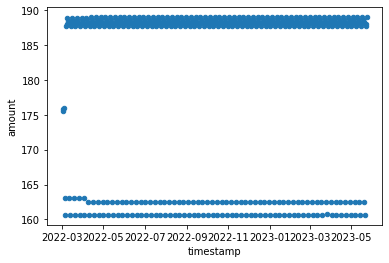

In [335]:
gt.plot.scatter(x='timestamp', y='amount')

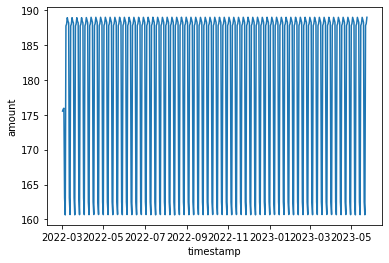

In [336]:
import seaborn as sns

sns.lineplot(data=gt, x='timestamp', y='amount')

In [337]:

income = wages.groupby('participantId').sum('amount').reset_index()
income

,participantId,amount
0,0,134904.668457
1,1,118421.022133
2,2,104429.003555
3,3,100943.911799
4,4,130266.886107
...,...,...
1006,1006,28160.145453
1007,1007,28134.000854
1008,1008,56506.356576
1009,1009,28045.271601


In [338]:
income.dtypes

participantId      int64
amount           float64
dtype: object

In [339]:
income = income.round(decimals=2)

In [340]:
import altair as alt


source = income

# Brush for selection
brush = alt.selection(type='interval')

# Scatter Plot
points = alt.Chart(source).mark_point().encode(
    x='participantId:Q',
    y='amount:Q',
    color=alt.condition(brush, 'amount:Q', alt.value('grey'))
).add_selection(brush)

# Base chart for data tables
ranked_text = alt.Chart(source).mark_text().encode(
    y=alt.Y('row_number:O',axis=None)
).transform_window(
    row_number='row_number()'
).transform_filter(
    brush
).transform_window(
    rank='rank(row_number)'
).transform_filter(
    alt.datum.rank<20
)

# Data Tables
ID = ranked_text.encode(text='participantId:N').properties(title='ID')
Income = ranked_text.encode(text='amount:N').properties(title='Income')
text = alt.hconcat(ID, Income) # Combine data tables

# Build chart
alt.hconcat(
    points,
    text
).resolve_legend(
    color="independent"
)


alt.HConcatChart(...)

In [389]:
innout = df.groupby(['participantId', 'category']).sum('amount').reset_index()
innout

,participantId,category,amount
0,0,Education,-608.086073
1,0,Food,-3868.580758
2,0,Recreation,-4870.355051
3,0,Shelter,-8879.817947
4,0,Wage,134904.668457
...,...,...,...
4137,1009,Wage,28045.271601
4138,1010,Food,-4284.186971
4139,1010,Recreation,-7601.419125
4140,1010,Shelter,-7445.637320


In [342]:
topincome = income[income['amount'] >= 100000] 
midincome = income[(income['amount'] >= 50000) & (income['amount'] <= 100000)]
lowincome = income[(income['amount'] <= 50000) & (income['amount'] >= 25000)]
criticalincome = income[income['amount'] < 25000]

In [343]:
lowid=lowincome['participantId']
midid=midincome['participantId']
topid=topincome['participantId']
criticalid=criticalincome['participantId']

In [344]:
import numpy as np
np.array(lowid)
np.array(midid)
np.array(topid)
np.array(criticalid)

array([ 44, 127, 142, 154, 161, 256, 262, 267, 279, 285, 288, 298, 301,
       346, 352, 356, 380, 382, 383, 384, 392, 406, 407, 509, 510, 512,
       514, 523, 526, 539, 541, 553, 558, 567, 568, 572, 574, 575, 577,
       580, 589, 595, 599, 602, 603, 604, 605, 611, 615, 617, 621, 628,
       629, 634, 639, 641, 643, 647, 653, 655, 657, 658, 663, 668, 670,
       756, 757, 760, 761, 762, 768, 771, 773, 774, 780, 785, 789, 790,
       791, 792, 793, 794, 799, 802, 806, 808, 816, 817, 818, 824, 825,
       827, 828, 831, 832, 834, 839, 842, 846, 847, 853, 855, 856, 858,
       859, 860, 862, 864, 867, 872, 875, 876, 883, 884, 885, 886, 887,
       892, 896, 897, 900, 901, 902, 907, 909, 911, 919, 920, 923, 924,
       925])

In [410]:
topid.count()

95

In [419]:
def barsize(IncomeGroup):
  if IncomeGroup == 0:
    return 150*131/1010
  elif IncomeGroup == 1:
    return 150*375/1010  
  elif IncomeGroup == 2:
    return 150*410/1010
  else:
    return 150*95/1010 

In [420]:
barsize(2)

60.89108910891089

In [429]:
ico=pd.DataFrame({"IncomeGroup":
    ["Critical Income", "Low Income", "Mid Income", "Top Income"], "Number of Participants":[131, 375, 410, 95]
})
ico

,IncomeGroup,Number of Participants
0,Critical Income,131
1,Low Income,375
2,Mid Income,410
3,Top Income,95


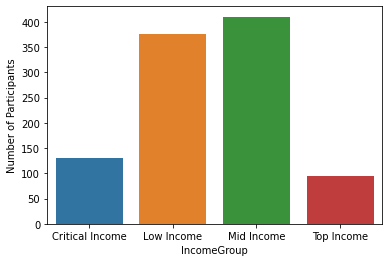

In [430]:
sns.barplot(data=ico, x="IncomeGroup", y="Number of Participants")

In [345]:
lowinnout=innout[innout['participantId'].isin(lowid)]
midinnout=innout[innout['participantId'].isin(midid)]
topinnout=innout[innout['participantId'].isin(topid)]

In [346]:
def groupIncome(sueldo):
  if sueldo < 25000:
    return 0
  elif sueldo > 25000 and sueldo < 50000:
    return 1
  elif sueldo > 50000 and sueldo < 100000:
    return 2 
  else:
    return 3   

  

In [347]:
from numpy.lib.arraysetops import isin
def groupIncomebyID(ID):
  if ID in(criticalid):
    return 0
  elif ID in(lowid):
    return 1
  elif ID in(midid):
    return 2 
  else:
    return 3



In [348]:
income['IncomeGroup'] = income.apply(lambda x: groupIncome(x['amount']), axis=1) 
print(income)

      participantId     amount  IncomeGroup
0                 0  134904.67            3
1                 1  118421.02            3
2                 2  104429.00            3
3                 3  100943.91            3
4                 4  130266.89            3
...             ...        ...          ...
1006           1006   28160.15            1
1007           1007   28134.00            1
1008           1008   56506.36            2
1009           1009   28045.27            1
1010           1010   33381.07            1

[1011 rows x 3 columns]


In [349]:
groupIncomebyID(1010)

1

In [395]:
innout['IncomeGroup'] = innout.apply(lambda x: groupIncomebyID(x['participantId']), axis=1) 
print(innout)

      participantId    category         amount  IncomeGroup
0                 0   Education    -608.086073            3
1                 0        Food   -3868.580758            3
2                 0  Recreation   -4870.355051            3
3                 0     Shelter   -8879.817947            3
4                 0        Wage  134904.668457            3
...             ...         ...            ...          ...
4137           1009        Wage   28045.271601            1
4138           1010        Food   -4284.186971            1
4139           1010  Recreation   -7601.419125            1
4140           1010     Shelter   -7445.637320            1
4141           1010        Wage   33381.068889            1

[4142 rows x 4 columns]


In [400]:
innout[innout['IncomeGroup']==1].count()

participantId    1610
category         1610
amount           1610
IncomeGroup      1610
dtype: int64

In [352]:
import altair as alt

source = income

alt.Chart(source).mark_bar().encode(
    alt.X("amount:Q", bin=True),
    y='count()',
)

alt.Chart(...)

In [427]:
source = innout

alt.Chart(source).mark_bar(size=barsize(altx)).encode(
    
    alt.X('IncomeGroup:N',
        scale=alt.Scale(zero=False)
    ),
    y='mean(amount):Q',
    color='category'
).properties(width = 400, height = 600)

alt.Chart(...)

In [391]:
inabs=innout['amount'].abs()

In [392]:
innout.head(20)

,participantId,category,amount
0,0,Education,-608.086073
1,0,Food,-3868.580758
2,0,Recreation,-4870.355051
3,0,Shelter,-8879.817947
4,0,Wage,134904.668457
5,1,Education,-608.086073
6,1,Food,-3912.751140
7,1,Recreation,-7738.859696
8,1,Shelter,-8879.817947
9,1,Wage,118421.022133


In [356]:
apartments = pd.read_csv('/content/drive/MyDrive/2022 1Q/VAST-Challenge-2022/Datasets/Attributes/Apartments.csv')
apartments

,apartmentId,rentalCost,maxOccupancy,numberOfRooms,location,buildingId
0,1,768.16,2,4,POINT (1077.6979444315298 648.4427163702453),340
1,2,1014.55,2,1,POINT (-185.9292838076562 1520.3270983045118),752
2,3,1057.39,4,3,POINT (2123.0141855392585 5126.753457243003),639
3,4,1259.10,4,3,POINT (2103.6301776944765 4266.932930123476),397
4,5,411.50,1,4,POINT (7.0589743819342985 79.96163671849988),628
...,...,...,...,...,...,...
1512,1729,703.80,2,4,POINT (-4097.077996668109 7409.520667070145),182
1513,1730,1104.62,4,2,POINT (-4334.244917025952 7164.441147048659),613
1514,1731,890.69,4,1,POINT (-3330.5855567286076 7588.646019451729),513
1515,1732,703.80,2,3,POINT (-4151.807872263513 7409.520667070145),182


In [357]:
apartments.dtypes

apartmentId        int64
rentalCost       float64
maxOccupancy       int64
numberOfRooms      int64
location          object
buildingId         int64
dtype: object

In [358]:
apartments.corr()

,apartmentId,rentalCost,maxOccupancy,numberOfRooms,buildingId
apartmentId,1.000000,-0.010318,-0.027703,0.055018,0.003167
rentalCost,-0.010318,1.000000,0.812023,-0.052602,0.005122
maxOccupancy,-0.027703,0.812023,1.000000,-0.058600,0.003362
numberOfRooms,0.055018,-0.052602,-0.058600,1.000000,-0.005677
buildingId,0.003167,0.005122,0.003362,-0.005677,1.000000


In [359]:
apartments4=apartments[apartments['numberOfRooms']==4]
apartments4.describe()

,apartmentId,rentalCost,maxOccupancy,numberOfRooms,buildingId
count,361.000000,361.000000,361.000000,361.0,361.000000
mean,900.606648,807.804515,2.479224,4.0,546.235457
std,523.076572,274.459282,1.087932,0.0,313.252609
min,1.000000,350.160000,1.000000,4.0,2.000000
25%,492.000000,590.570000,2.000000,4.0,274.000000
50%,919.000000,794.250000,3.000000,4.0,552.000000
75%,1398.000000,989.530000,3.000000,4.0,833.000000
max,1729.000000,1594.330000,4.000000,4.0,1040.000000


In [360]:
apartments4['rentalCost'].mean()

807.8045152354571

In [361]:
source = apartments

alt.Chart(source).mark_bar().encode(
    
    y='mean(rentalCost)',
    x='numberOfRooms').properties(width = 900, height = 400)

alt.Chart(...)

In [362]:
schools = pd.read_csv('/content/drive/MyDrive/2022 1Q/VAST-Challenge-2022/Datasets/Attributes/Schools.csv')
schools

,schoolId,monthlyCost,maxEnrollment,location,buildingId
0,0,12.812445,242,POINT (-376.7505037068263 1607.9843212558562),662
1,450,91.143514,418,POINT (-2597.447677094323 3194.1547530883445),943
2,900,38.005380,394,POINT (-2539.1584040534744 6556.0323181733565),262
3,1350,73.197852,384,POINT (-4701.462928834322 5141.762936081409),123


In [363]:
innout[innout['category']=='Education']

,participantId,category,amount,IncomeGroup
0,0,Education,608.086073,3
5,1,Education,608.086073,3
10,2,Education,204.999120,3
15,3,Education,608.086073,3
20,4,Education,204.999120,3
...,...,...,...,...
3473,827,Education,76.010759,0
3476,828,Education,146.395704,0
3479,829,Education,204.999120,1
3484,830,Education,204.999120,2


In [364]:
dataset=pd.read_csv('/content/drive/MyDrive/2022 1Q/VAST-Challenge-2022/Datasets/Activity Logs/dataset_final.csv')
dataset

,Unnamed: 0,timestamp,participantId,hungerStatus,apartmentId,availableBalance,jobId,financialStatus,dailyFoodBudget,weeklyExtraBudget
0,115001,2023-05-22T07:15:00Z,206.0,BecameFull,84.0,27585.691035,47.0,Stable,16.0,9855.500601
1,67932,2023-05-22T02:45:00Z,717.0,BecomingHungry,1246.0,31847.411908,1137.0,Stable,12.0,11337.313895
2,17281,2023-05-21T22:00:00Z,166.0,BecomingHungry,171.0,25500.935289,7.0,Stable,16.0,8165.541346
3,433937,2023-05-23T13:25:00Z,630.0,BecomingHungry,1245.0,46943.420831,946.0,Stable,16.0,18378.638089
4,491190,2023-05-23T18:50:00Z,695.0,Hungry,1064.0,44746.313061,895.0,Stable,16.0,17620.710774
...,...,...,...,...,...,...,...,...,...,...
223195,1208378,2022-03-05T03:40:00Z,822.0,Hungry,166.0,671.473803,430.0,Stable,12.0,210.715992
223196,626987,2022-03-03T03:40:00Z,167.0,BecomingHungry,137.0,274.248599,83.0,Stable,20.0,405.915205
223197,261669,2022-03-01T21:30:00Z,831.0,BecomingHungry,NaN,2112.248683,1055.0,Unknown,16.0,0.000000
223198,1106662,2022-03-04T19:10:00Z,628.0,BecomingHungry,NaN,2440.974400,10.0,Unstable,20.0,0.000000


In [365]:
dataset

,Unnamed: 0,timestamp,participantId,hungerStatus,apartmentId,availableBalance,jobId,financialStatus,dailyFoodBudget,weeklyExtraBudget
0,115001,2023-05-22T07:15:00Z,206.0,BecameFull,84.0,27585.691035,47.0,Stable,16.0,9855.500601
1,67932,2023-05-22T02:45:00Z,717.0,BecomingHungry,1246.0,31847.411908,1137.0,Stable,12.0,11337.313895
2,17281,2023-05-21T22:00:00Z,166.0,BecomingHungry,171.0,25500.935289,7.0,Stable,16.0,8165.541346
3,433937,2023-05-23T13:25:00Z,630.0,BecomingHungry,1245.0,46943.420831,946.0,Stable,16.0,18378.638089
4,491190,2023-05-23T18:50:00Z,695.0,Hungry,1064.0,44746.313061,895.0,Stable,16.0,17620.710774
...,...,...,...,...,...,...,...,...,...,...
223195,1208378,2022-03-05T03:40:00Z,822.0,Hungry,166.0,671.473803,430.0,Stable,12.0,210.715992
223196,626987,2022-03-03T03:40:00Z,167.0,BecomingHungry,137.0,274.248599,83.0,Stable,20.0,405.915205
223197,261669,2022-03-01T21:30:00Z,831.0,BecomingHungry,NaN,2112.248683,1055.0,Unknown,16.0,0.000000
223198,1106662,2022-03-04T19:10:00Z,628.0,BecomingHungry,NaN,2440.974400,10.0,Unstable,20.0,0.000000


In [366]:
from datetime import date

def to_date(d):
  d = d.split('T')[0].split('-')
  return date(int(d[0]), int(d[1]), int(d[2]))

dataset['timestamp'] = dataset['timestamp'].apply(to_date)

In [367]:
dataset['timestamp'].iloc[0]

datetime.date(2023, 5, 22)

In [368]:
dataset['participantId'] = dataset['participantId'].astype(np.int64)

In [369]:
ds=dataset.groupby('timestamp').mean('availableBalance').reset_index()
ds

,timestamp,Unnamed: 0,participantId,apartmentId,availableBalance,jobId,dailyFoodBudget,weeklyExtraBudget
0,2022-03-01,1.478808e+05,489.904255,837.770961,1560.296504,709.877660,15.950355,520.854861
1,2022-03-02,4.348635e+05,498.440147,872.607966,1623.078352,692.259669,16.036832,532.468049
2,2022-03-03,7.283151e+05,495.439716,841.354455,1767.215838,684.452128,15.659574,565.514492
3,2022-03-04,1.020630e+06,500.560071,845.997963,1877.690642,668.989399,16.028269,560.563602
4,2022-03-05,1.298388e+06,463.569593,831.828508,1996.456245,675.265525,15.537473,677.376700
...,...,...,...,...,...,...,...,...
445,2023-05-20,1.249067e+06,468.333333,848.249524,44028.063749,689.569524,15.321905,13342.794652
446,2023-05-21,9.779877e+05,472.697885,853.401813,40897.662233,653.966767,15.558912,13399.835901
447,2023-05-22,1.654175e+05,480.154734,845.780600,41808.300296,683.197844,15.578137,14987.474229
448,2023-05-23,4.205058e+05,485.669732,847.015326,40121.819603,670.657471,15.644444,16161.245387


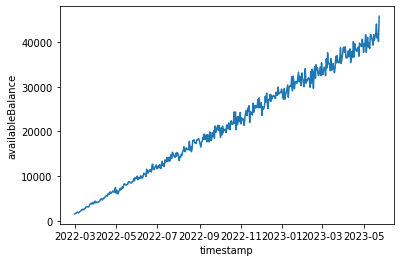

In [370]:
sns.lineplot(data=ds, x='timestamp', y='availableBalance')

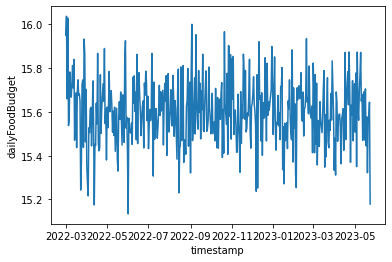

In [371]:
sns.lineplot(data=ds, x='timestamp', y='dailyFoodBudget')

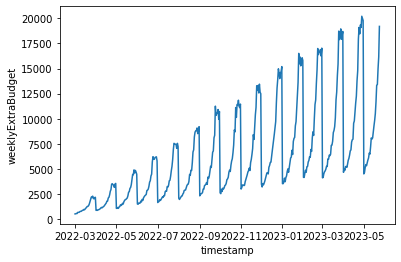

In [372]:
sns.lineplot(data=ds, x='timestamp', y='weeklyExtraBudget')

In [373]:
dataset[dataset['participantId']==0]

,Unnamed: 0,timestamp,participantId,hungerStatus,apartmentId,availableBalance,jobId,financialStatus,dailyFoodBudget,weeklyExtraBudget
135,128880,2023-05-22,0,BecameFull,926.0,115464.508654,254.0,Stable,12.0,41316.014136
617,331280,2023-05-23,0,Starving,926.0,115871.615312,254.0,Stable,12.0,45908.170517
1245,208960,2023-05-22,0,BecameFull,926.0,115738.806144,254.0,Stable,12.0,41316.014136
1534,318080,2023-05-23,0,Starving,926.0,115871.615312,254.0,Stable,12.0,45908.170517
1992,296080,2023-05-23,0,Starving,926.0,115871.615312,254.0,Stable,12.0,45908.170517
...,...,...,...,...,...,...,...,...,...,...
218756,1318342,2022-12-07,0,Hungry,926.0,73098.860210,254.0,Stable,12.0,11088.811944
220457,725703,2022-08-20,0,BecomingHungry,926.0,45254.764202,254.0,Stable,12.0,13945.169649
221131,1486330,2022-07-10,0,JustAte,926.0,34616.527684,254.0,Stable,12.0,6352.934911
221143,419770,2022-07-06,0,Starving,926.0,33567.141363,254.0,Stable,12.0,5393.390613


In [374]:
w=df[df['category']=='Wage']
s=df[df['category']=='Shelter']
r=df[df['category']=='Recreation']
f=df[df['category']=='Food']
e=df[df['category']=='Education']


In [375]:
wdf=w.groupby('timestamp').mean('amount')

In [376]:
dfabs=df.groupby(['category', 'timestamp']).mean('amount').abs()
dfabs.drop(columns=['participantId'])

amount
category  timestamp                       
Education 2022-03-01T00:00:00Z   47.687176
          2022-04-01T00:00:00Z   46.248733
          2022-05-01T00:00:00Z   46.248733
          2022-06-01T00:00:00Z   46.248733
          2022-07-01T00:00:00Z   46.248733
...                                    ...
Wage      2023-05-24T17:45:00Z  107.644015
          2023-05-24T17:50:00Z   60.287048
          2023-05-24T17:55:00Z   52.041552
          2023-05-24T18:00:00Z   95.875567
          2023-05-24T18:10:00Z   85.534750

[210808 rows x 1 columns]

In [377]:
from datetime import date

def to_date(d):
  d = d.split('T')[0].split('-')
  return date(int(d[0]), int(d[1]), int(d[2]))

df['timestamp'] = df['timestamp'].apply(to_date)

In [378]:
wdf

,participantId,amount
timestamp,,
2022-03-01T00:00:00Z,505.000000,2567.155763
2022-03-01T07:05:00Z,1008.000000,1.693478
2022-03-01T07:10:00Z,541.000000,1.576946
2022-03-01T07:15:00Z,488.166667,1.662095
2022-03-01T07:20:00Z,496.300000,2.481087
...,...,...
2023-05-24T17:45:00Z,387.900000,107.644015
2023-05-24T17:50:00Z,440.000000,60.287048
2023-05-24T17:55:00Z,571.000000,52.041552
